In [1]:
from google.colab import drive

In [2]:
drive.mount(('../content/drive'))

Drive already mounted at ../content/drive; to attempt to forcibly remount, call drive.mount("../content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df_1=pd.read_csv('/content/drive/My Drive/PGDSBA/Machine Learning/Alternate Project/Shark Tank Companies (2).csv')

In [5]:
df_1.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   deal                    495 non-null    bool  
 1   description             495 non-null    object
 2   episode                 495 non-null    int64 
 3   category                495 non-null    object
 4   entrepreneurs           423 non-null    object
 5   location                495 non-null    object
 6   website                 457 non-null    object
 7   askedFor                495 non-null    int64 
 8   exchangeForStake        495 non-null    int64 
 9   valuation               495 non-null    int64 
 10  season                  495 non-null    int64 
 11  shark1                  495 non-null    object
 12  shark2                  495 non-null    object
 13  shark3                  495 non-null    object
 14  shark4                  495 non-null    object
 15  shark5

In [7]:
df_1.shape

(495, 19)

In [8]:
df_1.isnull().sum()

deal                       0
description                0
episode                    0
category                   0
entrepreneurs             72
location                   0
website                   38
askedFor                   0
exchangeForStake           0
valuation                  0
season                     0
shark1                     0
shark2                     0
shark3                     0
shark4                     0
shark5                     0
title                      0
episode-season             0
Multiple Entreprenuers     0
dtype: int64

In [9]:
df_1.describe()

,episode,askedFor,exchangeForStake,valuation,season
count,495.000000,4.950000e+02,495.000000,4.950000e+02,495.000000
mean,12.125253,2.584909e+05,17.539394,2.165615e+06,4.048485
std,7.918133,4.615999e+05,10.061047,3.761971e+06,1.658518
min,1.000000,1.000000e+04,3.000000,4.000000e+04,1.000000
25%,5.000000,7.500000e+04,10.000000,4.400000e+05,3.000000
50%,11.000000,1.500000e+05,15.000000,1.000000e+06,4.000000
75%,18.000000,2.500000e+05,20.000000,2.000000e+06,5.000000
max,29.000000,5.000000e+06,100.000000,3.000000e+07,6.000000


In [10]:
df_1.columns

Index(['deal', 'description', 'episode', 'category', 'entrepreneurs',
       'location', 'website', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'episode-season', 'Multiple Entreprenuers'],
      dtype='object')

In [11]:
df=df_1.drop(['episode', 'category', 'entrepreneurs',
       'location', 'website', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'episode-season', 'Multiple Entreprenuers'],axis=1)

In [12]:
df.head()

,deal,description
0,False,Bluetooth device implant for your ear.
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...


In [13]:
df.isnull().sum()

deal           0
description    0
dtype: int64

## **No of words**

In [14]:
df['word_count'] = df['description'].apply(lambda x: len(str(x).split(" ")))
df[['description','word_count']].head()

,description,word_count
0,Bluetooth device implant for your ear.,6
1,Retail and wholesale pie factory with two reta...,12
2,Ava the Elephant is a godsend for frazzled par...,37
3,"Organizing, packing, and moving services deliv...",9
4,Interactive media centers for healthcare waiti...,14


# **Number of Characters- including spaces**

In [15]:
df['char_count'] = df['description'].str.len() ## this also includes spaces
df[['description','char_count']].head()

,description,char_count
0,Bluetooth device implant for your ear.,38
1,Retail and wholesale pie factory with two reta...,73
2,Ava the Elephant is a godsend for frazzled par...,244
3,"Organizing, packing, and moving services deliv...",68
4,Interactive media centers for healthcare waiti...,112


In [16]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['description'].apply(lambda x: avg_word(x))
df[['description','avg_word']].head()

,description,avg_word
0,Bluetooth device implant for your ear.,5.500000
1,Retail and wholesale pie factory with two reta...,5.166667
2,Ava the Elephant is a godsend for frazzled par...,5.621622
3,"Organizing, packing, and moving services deliv...",6.666667
4,Interactive media centers for healthcare waiti...,7.071429


# **No. of Stopwords**

In [17]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords']= df['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['description','stopwords']].head()  

,description,stopwords
0,Bluetooth device implant for your ear.,2
1,Retail and wholesale pie factory with two reta...,3
2,Ava the Elephant is a godsend for frazzled par...,13
3,"Organizing, packing, and moving services deliv...",2
4,Interactive media centers for healthcare waiti...,2


Number of Special Characters

In [19]:
df['hastags'] = df['description'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['description','hastags']].head()

,description,hastags
0,Bluetooth device implant for your ear.,0
1,Retail and wholesale pie factory with two reta...,0
2,Ava the Elephant is a godsend for frazzled par...,0
3,"Organizing, packing, and moving services deliv...",0
4,Interactive media centers for healthcare waiti...,0


Number of Numerics

In [20]:
df['numerics'] = df['description'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['description','numerics']].head()

,description,numerics
0,Bluetooth device implant for your ear.,0
1,Retail and wholesale pie factory with two reta...,0
2,Ava the Elephant is a godsend for frazzled par...,0
3,"Organizing, packing, and moving services deliv...",0
4,Interactive media centers for healthcare waiti...,0


# Removal of Punctuation

In [21]:
df['description'] = df['description'].str.replace('[^\w\s]','')
df['description'].head()

0                Bluetooth device implant for your ear
1    Retail and wholesale pie factory with two reta...
2    Ava the Elephant is a godsend for frazzled par...
3    Organizing packing and moving services deliver...
4    Interactive media centers for healthcare waiti...
Name: description, dtype: object

removal of Stop words

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['description'].head()

0                         Bluetooth device implant ear
1    Retail wholesale pie factory two retail locati...
2    Ava Elephant godsend frazzled parents young ch...
3    Organizing packing moving services delivered c...
4    Interactive media centers healthcare waiting r...
Name: description, dtype: object

Common Words Removal

In [23]:
freq = pd.Series(' '.join(df['description']).split()).value_counts()[:10]
freq

A           140
The         133
also         61
made         57
company      46
makes        43
make         43
even         39
like         38
products     32
dtype: int64

In [24]:
df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['description'].head()

0                         Bluetooth device implant ear
1    Retail wholesale pie factory two retail locati...
2    Ava Elephant godsend frazzled parents young ch...
3    Organizing packing moving services delivered c...
4    Interactive media centers healthcare waiting r...
Name: description, dtype: object

Rare words Removal

In [25]:
freq = pd.Series(' '.join(df['description']).split()).value_counts()[-10:]
freq

flapjack      1
Drake         1
ribbons       1
skip          1
Pillowcase    1
Sauvignon     1
Obstacle      1
instructed    1
result        1
continuous    1
dtype: int64

In [26]:
df['description'] = df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['description'].head()

0                         Bluetooth device implant ear
1    Retail wholesale pie factory two retail locati...
2    Ava Elephant godsend frazzled parents young ch...
3    Organizing packing moving services delivered c...
4    Interactive media centers healthcare waiting r...
Name: description, dtype: object

removal of suffices, like “ing”, “ly”, “s”, etc.

In [27]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['description'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                          bluetooth devic implant ear
1    retail wholesal pie factori two retail locat n...
2    ava eleph godsend frazzl parent young children...
3            organ pack move servic deliv colleg women
4    interact media center healthcar wait room offe...
Name: description, dtype: object

Converting them into 2 corpus

In [28]:
df_true=df[df.deal==True]
df_true.head(10)

,deal,description,word_count,char_count,avg_word,stopwords,hastags,numerics
1,True,Retail wholesale pie factory two retail locati...,12,73,5.166667,3,0,0
2,True,Ava Elephant godsend frazzled parents young ch...,37,244,5.621622,13,0,0
5,True,One first entrepreneurs pitch Shark Tank Susan...,55,365,5.654545,13,0,0
9,True,An educational record label publishing house d...,18,122,5.833333,5,0,0
10,True,batteryoperated cooking device siphons juice s...,18,117,5.555556,6,0,0
12,True,line books written help children find inner calm,11,57,4.272727,2,0,0
16,True,Coverplay slipcover childrens play yards Much ...,124,722,4.830645,44,0,0
18,True,webbased buys back sells 10 unused gift cards ...,22,107,3.909091,10,0,0
20,True,An online journaling service focused facilitat...,16,130,7.187500,3,0,0
22,True,fitness machine series bands varying weights p...,15,83,4.600000,5,0,0


In [29]:
df_false=df[df.deal==False]
df_false.head()

,deal,description,word_count,char_count,avg_word,stopwords,hastags,numerics
0,False,Bluetooth device implant ear,6,38,5.500000,2,0,0
3,False,Organizing packing moving services delivered c...,9,68,6.666667,2,0,0
4,False,Interactive media centers healthcare waiting r...,14,112,7.071429,2,0,0
6,False,mixed martial arts clothing line looking becom...,19,110,4.842105,3,0,0
7,False,Attach Noted detachable arm holds PostIt notes...,17,91,4.411765,7,0,0


Most frequently occurring words, when the deal is True

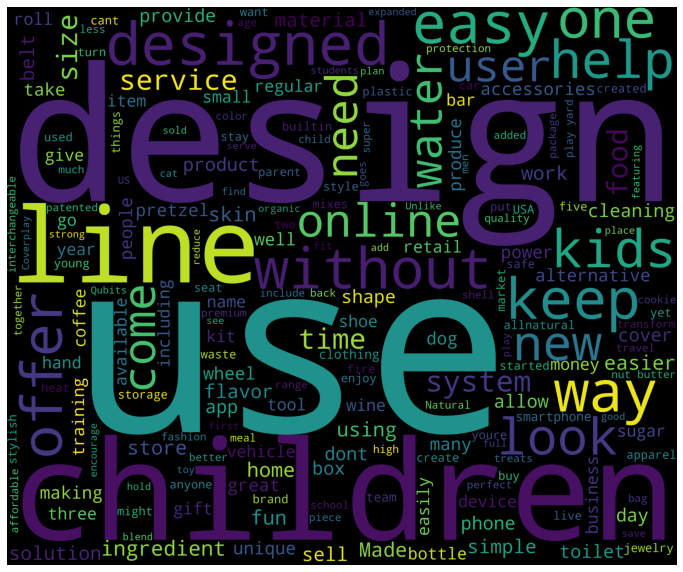

In [30]:
from wordcloud import WordCloud,STOPWORDS
new_df=df[df['deal']==True]
words = ' '.join(new_df['description'])
cleaned_word1 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word1)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [31]:
cleaned_word1

'Retail wholesale pie factory two retail locations New Jersey Ava Elephant godsend frazzled parents young children everywhere This talking medicine dispenser easy administer medicine little ones turning experience playful providing positive reinforcement One first entrepreneurs pitch Shark Tank Susan Knapp presented Perfect Pear line pearfocused gourmet food Sold across 650 retail stores Perfect Pear product portfolio includes jams jellies spreads tapenades vinegars marinades dressings many others designed showcase flavors health benefits pears An educational record label publishing house designed get students learning classic works literature batteryoperated cooking device siphons juice silicone basting brush injector tip marinades line books written help children find inner calm Coverplay slipcover childrens play yards Much mattress play yards cant laundered yet babies children spend lots time guess leads Coverplay rescue Fitting snugly standard size play yards Coverplay offers quick

In [42]:
len(cleaned_word1)

46518

In [32]:
from nltk.tokenize import word_tokenize  
from nltk.probability import FreqDist    
fdist = FreqDist()  
for word in word_tokenize(cleaned_word1):
  fdist[word] += 1


In [33]:
fdist.most_common(20)

[('This', 20),
 ('These', 19),
 ('You', 19),
 ('easy', 18),
 ('line', 18),
 ('designed', 18),
 ('way', 18),
 ('without', 18),
 ('product', 15),
 ('online', 15),
 ('kids', 15),
 ('use', 15),
 ('water', 15),
 ('new', 14),
 ('system', 14),
 ('children', 13),
 ('An', 13),
 ('offers', 13),
 ('look', 13),
 ('keep', 13)]

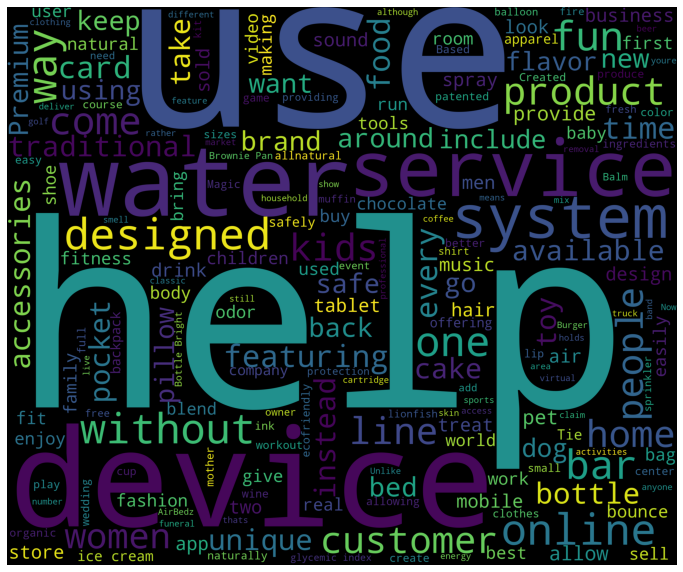

In [34]:
from wordcloud import WordCloud,STOPWORDS
new_df=df[df['deal']==False]
words = ' '.join(new_df['description'])
cleaned_word2 = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word2)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [35]:
cleaned_word2

'Bluetooth device implant ear Organizing packing moving services delivered college women Interactive media centers healthcare waiting rooms offering patients web access educational information mixed martial arts clothing line looking become next big brand active sports streetwear apparel Attach Noted detachable arm holds PostIt notes side laptop screen safety device seatbelts It prevents driver starting vehicle unless seatbelt buckled Household items twist recycled chopsticks Guitars folding neck designed fit backpack overhead compartment airplane 50 State Capitals 50 Fun Minutes efficient entertaining method learn US geography This set flash cards combines phonetics cartoons associations keep kids interest drive longterm learning retention Author Ken Bradford worked closely public private school teachers develop fun satisfying study aide franchisemodel offering professional graffiti removal owns trademarks words Coffee Cappuccino Java highlycaffeinated words use plush toys Inspiration

In [43]:
len(cleaned_word2)

34454

In [36]:
fdist2 = FreqDist()  
for word in word_tokenize(cleaned_word2):
  fdist2[word] += 1

In [37]:
fdist2.most_common(20)

[('An', 19),
 ('use', 16),
 ('system', 16),
 ('water', 16),
 ('product', 15),
 ('online', 15),
 ('designed', 14),
 ('without', 13),
 ('device', 12),
 ('line', 11),
 ('fun', 11),
 ('allows', 11),
 ('people', 11),
 ('featuring', 10),
 ('one', 10),
 ('way', 10),
 ('helps', 10),
 ('It', 9),
 ('service', 9),
 ('instead', 9)]